# 노인 복지 데이터 분석

In [1]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql import Window

In [2]:
spark = SparkSession.builder.appName("Pyspark_practice").getOrCreate()

### 1. 사회적 약자에 대한 연도별 시민의식의 변화
- '어르신(65세이상)의 사회복지 확대를 위해 세금부담 의향이 있음'에 대한 시민들의 의식 변화

In [13]:
citizenOpinion = spark.read.csv("사회적+약자에+대한+시민의식.csv", header=True)
citizenOpinion.show()

+---------+----------------+---------+-----------------------------------+----------------------------------+---------------------------------+----------------------------------+---------+-----------------------------------+----------------------------------+---------------------------------+----------------------------------+---------+-----------------------------------+----------------------------------+---------------------------------+----------------------------------+---------+-----------------------------------+----------------------------------+---------------------------------+----------------------------------+---------+-----------------------------------+----------------------------------+---------------------------------+----------------------------------+---------+-----------------------------------+----------------------------------+---------------------------------+----------------------------------+---------------------------------+
|구분별(1)|       구분별(2)|    20172|     

In [14]:
citizenOpinion.printSchema()

root
 |-- 구분별(1): string (nullable = true)
 |-- 구분별(2): string (nullable = true)
 |-- 20172: string (nullable = true)
 |-- 20173: string (nullable = true)
 |-- 20174: string (nullable = true)
 |-- 20175: string (nullable = true)
 |-- 20176: string (nullable = true)
 |-- 20187: string (nullable = true)
 |-- 20188: string (nullable = true)
 |-- 20189: string (nullable = true)
 |-- 201810: string (nullable = true)
 |-- 201811: string (nullable = true)
 |-- 201912: string (nullable = true)
 |-- 201913: string (nullable = true)
 |-- 201914: string (nullable = true)
 |-- 201915: string (nullable = true)
 |-- 201916: string (nullable = true)
 |-- 202017: string (nullable = true)
 |-- 202018: string (nullable = true)
 |-- 202019: string (nullable = true)
 |-- 202020: string (nullable = true)
 |-- 202021: string (nullable = true)
 |-- 202122: string (nullable = true)
 |-- 202123: string (nullable = true)
 |-- 202124: string (nullable = true)
 |-- 202125: string (nullable = true)
 |-- 202126: st

In [16]:
citizenOpinion.describe().show()

+-------+----------+---------------+------------------+---------------------------------+---------------------------------+-------------------------------+----------------------------------+-------------------+---------------------------------+---------------------------------+-------------------------------+----------------------------------+------------------+---------------------------------+---------------------------------+-------------------------------+----------------------------------+-------------------+---------------------------------+---------------------------------+-------------------------------+----------------------------------+-------------------+---------------------------------+---------------------------------+-------------------------------+----------------------------------+-------------------+---------------------------------+---------------------------------+-------------------------------+----------------------------------+---------------------------------+
|

In [17]:
selected_columns = ['20175', "201810" , '201915', '202020', '202125', '202230']
citizenOpinion = citizenOpinion.select(*selected_columns)

In [18]:
citizenOpinion = citizenOpinion \
    .withColumnRenamed("20175", "2017_노인인식") \
    .withColumnRenamed("201810", "2018_노인인식") \
    .withColumnRenamed("201915", "2019_노인인식") \
    .withColumnRenamed("202020", "2020_노인인식") \
    .withColumnRenamed("202125", "2021_노인인식") \
    .withColumnRenamed("202230", "2022_노인인식")

In [19]:
from pyspark.sql.functions import avg, col

# 2017-2019년 데이터 집계
period1_columns = ['2017_노인인식','2018_노인인식', '2019_노인인식']
period1 = citizenOpinion.select(period1_columns)
period1_avg = period1.select([avg(col(c)) for c in period1_columns])

# 2020-2022년 데이터 집계
period2_columns = ['2020_노인인식','2021_노인인식',  '2022_노인인식']
period2 = citizenOpinion.select(period2_columns)
period2_avg = period2.select([avg(col(c)) for c in period2_columns])

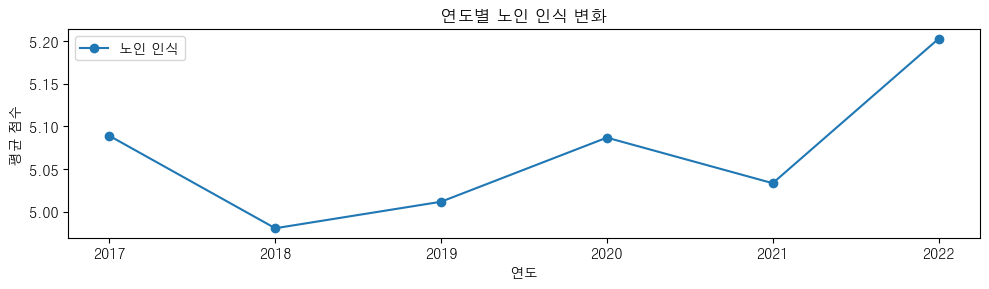

In [22]:
# 연도별로 노인 인식 평균 점수 계산
from pyspark.sql import functions as F

years = ['2017', '2018', '2019', '2020', '2021', '2022']
elderly_columns = [f'{year}_노인인식' for year in years]

# 노인 인식 평균 점수
elderly_avg = citizenOpinion.select([F.avg(F.col(col)).alias(col) for col in elderly_columns])

# Pandas DataFrame으로 변환
elderly_pd = elderly_avg.toPandas()

# 시각화를 위해 Matplotlib 사용
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))

from matplotlib import font_manager, rc
font_path = "H2GTRM.TTF"  # 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 노인 인식 평균 점수 플롯
plt.plot(years, elderly_pd.iloc[0], label='노인 인식', marker='o')

plt.title('연도별 노인 인식 변화')
plt.xlabel('연도')
plt.ylabel('평균 점수')
plt.xticks(range(len(years)), years) 
plt.legend()
plt.tight_layout()
plt.show()

### 2. 노인 인구 통계

In [23]:
elderly = spark.read.csv("주요_인구지표_성비_인구성장률_인구구조_부양비_등_전국.csv", header=True, encoding='utf-8')
elderly.show()

+-------------------------------+----------------------+--------+--------+--------+--------+--------+--------+
|                         가정별|     인구구조,부양비별|    2017|    2018|    2019|    2020|    2021|    2022|
+-------------------------------+----------------------+--------+--------+--------+--------+--------+--------+
|중위 추계(기본 추계: 출산율-...|            총인구(명)|51361911|51585058|51764822|51836239|51769539|51672569|
|중위 추계(기본 추계: 출산율-...|              남자(명)|25736793|25857689|25948706|25925697|25870941|25818686|
|중위 추계(기본 추계: 출산율-...|              여자(명)|25625118|25727369|25816116|25910542|25898598|25853883|
|중위 추계(기본 추계: 출산율-...|     성비(여자1백명당)|   100.4|   100.5|   100.5|   100.1|    99.9|    99.9|
|중위 추계(기본 추계: 출산율-...|            인구성장률|    0.28|    0.43|    0.35|    0.14|   -0.13|   -0.19|
|중위 추계(기본 추계: 출산율-...|      인구(명): 0-14세| 6724283| 6595054| 6448080| 6305870| 6148341| 5947964|
|중위 추계(기본 추계: 출산율-...|     인구(명): 15-64세|37571568|37623919|37627748|37378502|37051333|36743472|
|중위 추계(기

In [24]:
elderly.printSchema()

root
 |-- 가정별: string (nullable = true)
 |-- 인구구조,부양비별: string (nullable = true)
 |-- 2017: string (nullable = true)
 |-- 2018: string (nullable = true)
 |-- 2019: string (nullable = true)
 |-- 2020: string (nullable = true)
 |-- 2021: string (nullable = true)
 |-- 2022: string (nullable = true)



In [25]:
elderly.columns

['가정별', '인구구조,부양비별', '2017', '2018', '2019', '2020', '2021', '2022']

In [26]:
elderly.describe().show()

+-------+-------------------------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------------------+--------------------+
|summary|                         가정별|  인구구조,부양비별|               2017|                2018|                2019|                2020|               2021|                2022|
+-------+-------------------------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------------------+--------------------+
|  count|                             21|                 21|                 21|                  21|                  21|                  21|                 21|                  21|
|   mean|                           NULL|               NULL|  7337445.803809524|   7369324.458571428|   7395005.578571426|    7405208.72095238|   7395680.88904762|   7381828.829047618|
| stddev|                           NULL|               NULL|1.471944745297116E7|

In [27]:
from pyspark.sql.functions import col, regexp_replace, array, explode, lit, when
from pyspark.sql.types import DoubleType

years = ['2017', '2018', '2019', '2020', '2021', '2022']

age_composition = elderly.filter(elderly['인구구조,부양비별'].contains('구성비')) \
                    .select(
                        regexp_replace(col('인구구조,부양비별'), '- 구성비\(%\): ', '').alias('Age Group'),
                        *[col(year).cast(DoubleType()).alias(year) for year in years]
                    )

In [28]:
def to_long_format(df, by, cols, stack_cols):
    stack_expr = array(*[struct(lit(c).alias("Year"), col(c).alias("Percentage")) for c in cols])
    return df.select(by, explode(stack_expr)).select(by, "col.*")

In [29]:
from pyspark.sql.functions import struct
age_composition = to_long_format(age_composition, "Age Group", years, "Year")

In [30]:
age_composition = age_composition.toPandas()

##### 연령별로 나눠서 추출 
- 0-14세, 15-64세, 65세 이상

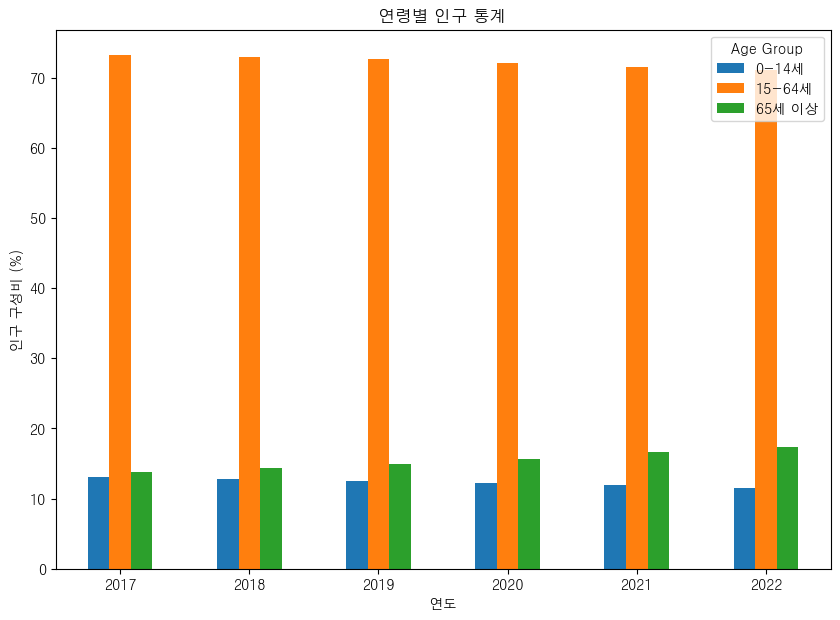

In [31]:
from matplotlib import font_manager, rc

font_path = "H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

pivot_df = age_composition.pivot(index='Year', columns='Age Group', values='Percentage')
pivot_df.plot(kind='bar', figsize=(10, 7))
plt.title('연령별 인구 통계')
plt.xlabel('연도')
plt.ylabel('인구 구성비 (%)')
plt.xticks(rotation=0)
plt.legend(title='Age Group')
plt.show()

##### 노인 인구만 따로 추출 후 확인

In [90]:
elderly_population = elderly.filter(col('인구구조,부양비별').contains('구성비(%): 65세 이상')).select('2017', '2018', '2019', '2020', '2021', '2022')

In [91]:
elderly_population = elderly_population.toPandas()

In [92]:
elderly_population = elderly_population.rename(index={0: '65세 이상'}).transpose()
elderly_population.columns = ['65세 이상 인구 비율']

In [93]:
elderly_population['65세 이상 인구 비율'] = elderly_population['65세 이상 인구 비율'].astype('float')

<Figure size 1000x600 with 0 Axes>

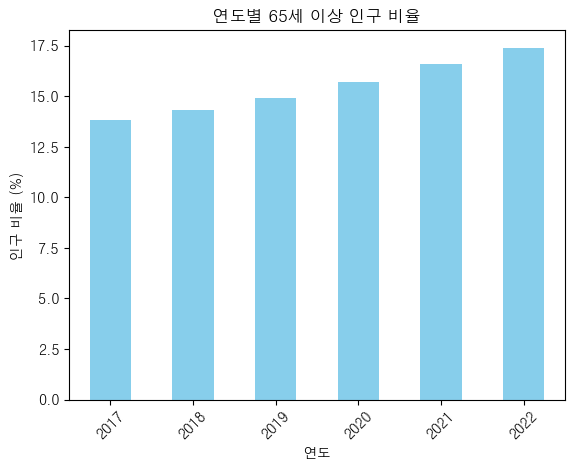

In [94]:
plt.figure(figsize=(10, 6))
elderly_population.plot(kind='bar', legend=False, color='skyblue')
plt.title('연도별 65세 이상 인구 비율')
plt.xlabel('연도')
plt.ylabel('인구 비율 (%)')
plt.xticks(rotation=45)
plt.show()

### 노인 복지 예산 데이터 추출

In [133]:
welfare = spark.read.csv("복지예산투입액(2017-2022).csv", header=True)
welfare.show()

+---------------------+----------+----------+----------+----------+----------+----------+
|                 구분|    2017년|    2018년|    2019년|    2020년|    2021년|    2022년|
+---------------------+----------+----------+----------+----------+----------+----------+
|    노인ㆍ청소년 세출| 3,924,071| 4,473,608| 5,526,538| 6,269,655| 6,967,458| 7,520,767|
|    취약계층지원 세출| 4,047,018| 4,424,530| 5,353,139| 6,721,316| 7,276,842| 7,654,356|
|    기초생활보장 세출| 1,093,281| 1,157,839| 1,264,016| 1,801,090| 1,996,060| 2,268,601|
|보육ㆍ가족및여성 세출| 4,538,571| 4,876,290| 5,723,328| 6,340,255| 5,766,602| 5,970,738|
|            노동 세출|   281,219|   327,877|   391,348|   788,787|   595,252|   469,676|
|            보훈 세출|    14,377|    17,894|    24,047|    30,935|    28,941|    34,539|
|            주택 세출| 1,708,710| 1,908,353| 2,527,551| 3,218,938| 3,058,260| 3,058,260|
|    사회복지일반 세출|    69,657|    80,576|    95,269| 3,010,393| 2,046,059| 2,046,059|
|                 합계|15,676,904|17,266,967|20,905,236|28,181,369|27,735,

In [112]:
welfare.printSchema()
welfare.describe().show()

root
 |-- 구분: string (nullable = true)
 |-- 2017년: string (nullable = true)
 |-- 2018년: string (nullable = true)
 |-- 2019년: string (nullable = true)
 |-- 2020년: string (nullable = true)
 |-- 2021년: string (nullable = true)
 |-- 2022년: string (nullable = true)

+-------+-----------------+---------+---------+---------+---------+---------+---------+
|summary|             구분|   2017년|   2018년|   2019년|   2020년|   2021년|   2022년|
+-------+-----------------+---------+---------+---------+---------+---------+---------+
|  count|                9|        9|        9|        9|        9|        9|        9|
|   mean|             NULL|     NULL|     NULL|     NULL|     NULL|     NULL|     NULL|
| stddev|             NULL|     NULL|     NULL|     NULL|     NULL|     NULL|     NULL|
|    min|기초생활보장 세출|1,093,281|1,157,839|1,264,016|1,801,090|1,996,060|2,046,059|
|    max|             합계|   69,657|   80,576|   95,269|  788,787|7,276,842|7,654,356|
+-------+-----------------+---------+---------+-----

In [113]:
welfare.columns

['구분', '2017년', '2018년', '2019년', '2020년', '2021년', '2022년']

In [123]:
categories = ['노인ㆍ청소년 세출', '취약계층지원 세출', '기초생활보장 세출', '보육ㆍ가족및여성 세출', '노동 세출', '보훈 세출', '주택 세출', '사회복지일반 세출']
welfare_budget = welfare.filter(welfare['구분'].isin(categories))

In [99]:
welfare_budget = welfare_budget.toPandas()
welfare_budget.set_index('구분', inplace=True)
welfare_budget

,2017년,2018년,2019년,2020년,2021년,2022년
구분,,,,,,
노인ㆍ청소년 세출,"3,924,071","4,473,608","5,526,538","6,269,655","6,967,458","7,520,767"
취약계층지원 세출,"4,047,018","4,424,530","5,353,139","6,721,316","7,276,842","7,654,356"
기초생활보장 세출,"1,093,281","1,157,839","1,264,016","1,801,090","1,996,060","2,268,601"
보육ㆍ가족및여성 세출,"4,538,571","4,876,290","5,723,328","6,340,255","5,766,602","5,970,738"
노동 세출,"281,219","327,877","391,348","788,787","595,252","469,676"
보훈 세출,"14,377","17,894","24,047","30,935","28,941","34,539"
주택 세출,"1,708,710","1,908,353","2,527,551","3,218,938","3,058,260","3,058,260"
사회복지일반 세출,"69,657","80,576","95,269","3,010,393","2,046,059","2,046,059"


In [100]:
import pandas as pd

# 문자열에 쉼표를 제거하고 숫자로 변환
welfare_budget = welfare_budget.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)
welfare_budget = welfare_budget.apply(pd.to_numeric)

<Figure size 1200x800 with 0 Axes>

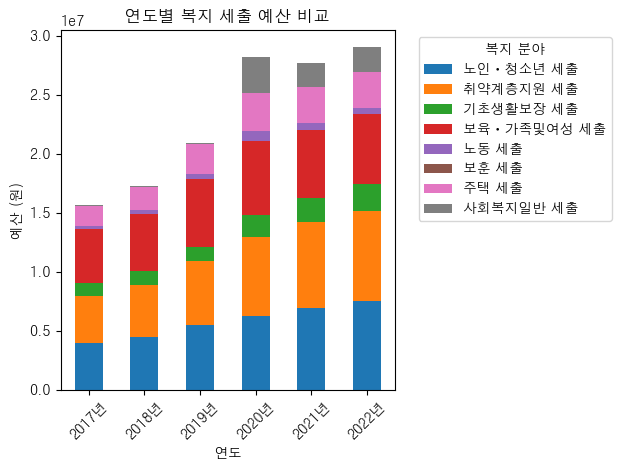

In [101]:
plt.figure(figsize=(12, 8))
welfare_budget.transpose().plot(kind='bar', stacked=True)
plt.title('연도별 복지 세출 예산 비교')
plt.xlabel('연도')
plt.ylabel('예산 (원)')
plt.xticks(rotation=45)
plt.legend(title='복지 분야', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 노인 인구 대비 복지 예산 분포 분석
##### M1) 노인만 포함된 예산을 찾을 수 없어서 노인+청소년 인구와 예산으로 통계


- 청소년 해당 연령 10-24세 
- 노인 해당 연령 65세 이상

In [106]:
youth_elderly = spark.read.csv("성_및_연령별_추계인구_전국.csv", header=True, encoding='utf-8')
youth_elderly.show()

+-------------------------------+----+---------+--------+--------+--------+--------+--------+--------+
|                         가정별|성별|   연령별|    2017|    2018|    2019|    2020|    2021|    2022|
+-------------------------------+----+---------+--------+--------+--------+--------+--------+--------+
|중위 추계(기본 추계: 출산율-...|전체|       계|51361911|51585058|51764822|51836239|51769539|51672569|
|중위 추계(기본 추계: 출산율-...|전체|  0 - 4세| 2151219| 2038736| 1930344| 1776616| 1618830| 1494041|
|중위 추계(기본 추계: 출산율-...|전체|  5 - 9세| 2308987| 2288927| 2276175| 2278285| 2231797| 2142084|
|중위 추계(기본 추계: 출산율-...|전체|10 - 14세| 2264077| 2267391| 2241561| 2250969| 2297714| 2311839|
|중위 추계(기본 추계: 출산율-...|전체|15 - 19세| 2982455| 2820005| 2685976| 2518218| 2345886| 2287873|
|중위 추계(기본 추계: 출산율-...|전체|20 - 24세| 3529657| 3498197| 3439052| 3392351| 3278327| 3105237|
|중위 추계(기본 추계: 출산율-...|전체|25 - 29세| 3368161| 3493062| 3587776| 3645542| 3675202| 3628784|
|중위 추계(기본 추계: 출산율-...|전체|30 - 34세| 3491542| 3360617| 3306462| 3307803| 33064

In [107]:
youth_elderly.printSchema()

root
 |-- 가정별: string (nullable = true)
 |-- 성별: string (nullable = true)
 |-- 연령별: string (nullable = true)
 |-- 2017: string (nullable = true)
 |-- 2018: string (nullable = true)
 |-- 2019: string (nullable = true)
 |-- 2020: string (nullable = true)
 |-- 2021: string (nullable = true)
 |-- 2022: string (nullable = true)



In [108]:
youth_elderly.columns

['가정별', '성별', '연령별', '2017', '2018', '2019', '2020', '2021', '2022']

In [109]:
age=['10 - 14세', '15 - 19세', '20 - 24세', '65 - 69세', '70 - 74세', '75 - 79세', 
              '80세이상', '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세', '100세 이상']

In [110]:
#성별에서 전체 성별로만 사용 & 연령대 설정
population = youth_elderly.filter((col('성별') == '전체') & (col('연령별').isin(age)))

In [73]:
#숫자형으로 변환
from pyspark.sql.types import IntegerType

for year in ['2017', '2018', '2019', '2020', '2021', '2022']:
    population = population.withColumn(year, col(year).cast(IntegerType()))

In [74]:
from pyspark.sql.functions import sum

# 각 연도별 합계를 계산하고, 컬럼 이름을 변경
population = population.select(
    sum('2017').alias('2017년'),
    sum('2018').alias('2018년'),
    sum('2019').alias('2019년'),
    sum('2020').alias('2020년'),
    sum('2021').alias('2021년'),
    sum('2022').alias('2022년')
)

population.show()

+--------+--------+--------+--------+--------+--------+
|  2017년|  2018년|  2019년|  2020년|  2021년|  2022년|
+--------+--------+--------+--------+--------+--------+
|17370675|17586636|17820214|18204229|18508777|18842060|
+--------+--------+--------+--------+--------+--------+



In [134]:
welfare_budget = welfare.filter(col('구분') == '노인ㆍ청소년 세출').select('2017년', '2018년', '2019년', '2020년', '2021년', '2022년')
welfare_budget.show()

+---------+---------+---------+---------+---------+---------+
|   2017년|   2018년|   2019년|   2020년|   2021년|   2022년|
+---------+---------+---------+---------+---------+---------+
|3,924,071|4,473,608|5,526,538|6,269,655|6,967,458|7,520,767|
+---------+---------+---------+---------+---------+---------+



In [76]:
#조인하기 위한 작업들
population_long = population.selectExpr(
    "stack(6, '2017', `2017년`, '2018', `2018년`, '2019', `2019년`, '2020', `2020년`, '2021', `2021년`, '2022', `2022년`) as (Year,Population)"
)

welfare_budget_long = welfare_budget.selectExpr(
    "stack(6, '2017', `2017년`, '2018', `2018년`, '2019', `2019년`, '2020', `2020년`, '2021', `2021년`, '2022', `2022년`) as (Year,Budget)"
)


In [77]:
# 조인하기
combined_data = population_long.join(welfare_budget_long, "Year")

combined_data.show()

+----+----------+---------+
|Year|Population|   Budget|
+----+----------+---------+
|2017|  17370675|3,924,071|
|2018|  17586636|4,473,608|
|2019|  17820214|5,526,538|
|2020|  18204229|6,269,655|
|2021|  18508777|6,967,458|
|2022|  18842060|7,520,767|
+----+----------+---------+



In [78]:
#시각화
combined_data = combined_data.toPandas()

In [102]:
#문자열 숫자형으로 변환 (, 제거)
combined_data = combined_data.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)
combined_data = combined_data.apply(pd.to_numeric)

In [103]:
# 노인 인구 대비 복지 예산 비율 계산
combined_data['Ratio'] = combined_data['Budget'] / combined_data['Population']

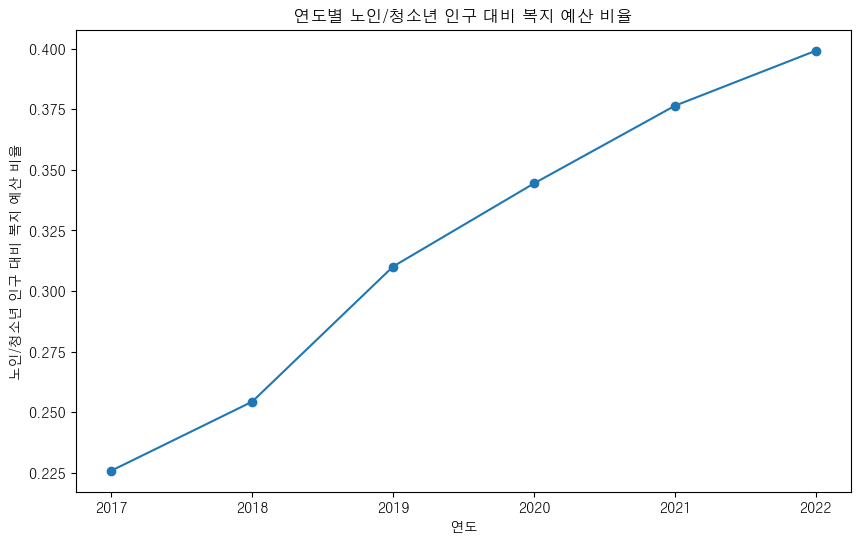

In [139]:
from matplotlib import font_manager, rc

font_path = "H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(10, 6))
plt.plot(combined_data['Year'], combined_data['Ratio'], marker='o')
plt.title('연도별 노인/청소년 인구 대비 복지 예산 비율')
plt.xlabel('연도')
plt.ylabel('노인/청소년 인구 대비 복지 예산 비율')
plt.show()

##### M2) 보건복지부 분야별 예산안 비율로 계산
- https://www.mohw.go.kr/board.es?mid=a10403000000&bid=0010&act=view&list_no=374925&tag=&nPage=1
    - (노인):(청소년) = 1.8-2.2:1

In [135]:
from pyspark.sql.functions import regexp_replace, col

# 쉼표를 제거하고 정수형으로 변환
for year in ['2017년', '2018년', '2019년', '2020년', '2021년', '2022년']:
    welfare_budget = welfare_budget.withColumn(year, regexp_replace(col(year), ',', '').cast('integer'))

In [137]:
# 지정된 비율 적용
ratios = {'2017년': (1.8, 1), '2018년': (1.7, 1), '2019년': (1.7, 1), 
          '2020년': (1.9, 1), '2021년': (2.2, 1), '2022년': (2.2, 1)}

for year, (a, b) in ratios.items():
    total_ratio = a + b
    welfare_budget = welfare_budget.withColumn(year, ((col(year) / total_ratio) * a).cast(IntegerType()))


welfare_budget.show()

+-------+-------+-------+-------+-------+-------+
| 2017년| 2018년| 2019년| 2020년| 2021년| 2022년|
+-------+-------+-------+-------+-------+-------+
|2522617|2816716|3479672|4107705|4790127|5170527|
+-------+-------+-------+-------+-------+-------+



In [138]:
elderly_age=['65 - 69세', '70 - 74세', '75 - 79세', '80세이상', '80 - 84세', 
             '85 - 89세', '90 - 94세', '95 - 99세', '100세 이상']

In [140]:
#성별에서 전체 성별로만 사용 & 연령대 설정
population = youth_elderly.filter((col('성별') == '전체') & (col('연령별').isin(elderly_age)))

In [141]:
#숫자형으로 변환
from pyspark.sql.types import IntegerType

for year in ['2017', '2018', '2019', '2020', '2021', '2022']:
    population = population.withColumn(year, col(year).cast(IntegerType()))

In [142]:
from pyspark.sql.functions import sum

# 각 연도별 합계를 계산하고, 컬럼 이름을 변경
population = population.select(
    sum('2017').alias('2017년'),
    sum('2018').alias('2018년'),
    sum('2019').alias('2019년'),
    sum('2020').alias('2020년'),
    sum('2021').alias('2021년'),
    sum('2022').alias('2022년')
)

population.show()

+-------+-------+-------+--------+--------+--------+
| 2017년| 2018년| 2019년|  2020년|  2021년|  2022년|
+-------+-------+-------+--------+--------+--------+
|8594486|9001043|9453625|10042691|10586850|11137111|
+-------+-------+-------+--------+--------+--------+



In [143]:
#조인하기 위한 작업들
population_long = population.selectExpr(
    "stack(6, '2017', `2017년`, '2018', `2018년`, '2019', `2019년`, '2020', `2020년`, '2021', `2021년`, '2022', `2022년`) as (Year,Population)"
)

welfare_budget_long = welfare_budget.selectExpr(
    "stack(6, '2017', `2017년`, '2018', `2018년`, '2019', `2019년`, '2020', `2020년`, '2021', `2021년`, '2022', `2022년`) as (Year,Budget)"
)

In [144]:
# 조인하기
combined_data = population_long.join(welfare_budget_long, "Year")

combined_data.show()

+----+----------+-------+
|Year|Population| Budget|
+----+----------+-------+
|2017|   8594486|2522617|
|2018|   9001043|2816716|
|2019|   9453625|3479672|
|2020|  10042691|4107705|
|2021|  10586850|4790127|
|2022|  11137111|5170527|
+----+----------+-------+



In [145]:
#시각화
combined_data = combined_data.toPandas()

In [146]:
#문자열 숫자형으로 변환 (, 제거)
combined_data = combined_data.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)
combined_data = combined_data.apply(pd.to_numeric)

In [147]:
# 노인 인구 대비 복지 예산 비율 계산
combined_data['Ratio'] = combined_data['Budget'] / combined_data['Population']

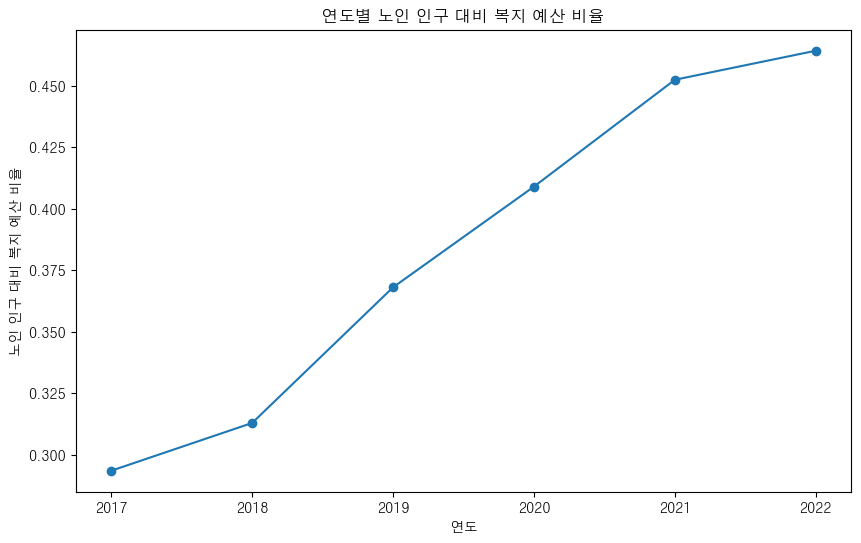

In [148]:
from matplotlib import font_manager, rc

font_path = "H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(10, 6))
plt.plot(combined_data['Year'], combined_data['Ratio'], marker='o')
plt.title('연도별 노인 인구 대비 복지 예산 비율')
plt.xlabel('연도')
plt.ylabel('노인 인구 대비 복지 예산 비율')
plt.show()

### 노인 사회활동 _ 노인 일자리 사업 

In [83]:
df1=spark.read.csv("노인일자리사업신청이유전체응답자.csv", header=True, encoding='utf-8')
df1.show()

+----------+-----------------+---------+--------------------------+---------------------------------+---------------------------------+--------+
| 특성별(1)|        특성별(2)|    20222|                     20223|                            20224|                            20225|   20226|
+----------+-----------------+---------+--------------------------+---------------------------------+---------------------------------+--------+
| 특성별(1)|        특성별(2)|전체 (명)|사회활동을 하고 싶어서 (%)|민간사업체(회사 기업 자영업 등...|경제적으로 도움이 되기 때문에 (%)|기타 (%)|
|      전체|             소계|     3596|                      21.9|                              3.4|                             74.2|     0.5|
|    지역별|           수도권|      910|                      23.4|                              4.8|                             70.9|     0.9|
|    지역별|           호남권|      729|                      14.9|                              1.0|                             83.4|     0.6|
|    지역별|           충청권|      614|                    

In [84]:
df1 = df1.withColumnRenamed('20222', '사회활동을 하고 싶어서 (%)') \
       .withColumnRenamed('20223', '민간사업체(회사, 기업, 자영업 등)에는 일자리가 없어서 (%)') \
       .withColumnRenamed('20224', '경제적으로 도움이 되기 때문에 (%)') \
       .withColumnRenamed('20225', '기타 (%)')

In [85]:
from pyspark.sql.functions import col

# 데이터프레임의 해당 열들을 숫자형으로 변환
columns_to_convert = ['사회활동을 하고 싶어서 (%)', '민간사업체(회사, 기업, 자영업 등)에는 일자리가 없어서 (%)', '경제적으로 도움이 되기 때문에 (%)', '기타 (%)']
for column in columns_to_convert:
    df1 = df1.withColumn(column, col(column).cast('float'))

In [86]:
# 전체 데이터에 대한 집계
overall_df1 = df1.groupBy().avg('사회활동을 하고 싶어서 (%)', '민간사업체(회사, 기업, 자영업 등)에는 일자리가 없어서 (%)', '경제적으로 도움이 되기 때문에 (%)', '기타 (%)').collect()

# 첫 번째 Row 객체에 접근
first_row = overall_df1[0]

# 필요한 값 추출
overall_values = [first_row['avg(사회활동을 하고 싶어서 (%))'], 
                  first_row['avg(민간사업체(회사, 기업, 자영업 등)에는 일자리가 없어서 (%))'], 
                  first_row['avg(경제적으로 도움이 되기 때문에 (%))'], 
                  first_row['avg(기타 (%))']]

In [87]:
categories = ['사회활동을 하고 싶어서 (%)', '민간사업체(회사, 기업, 자영업 등)에는 일자리가 없어서 (%)', '경제적으로 도움이 되기 때문에 (%)', '기타 (%)']

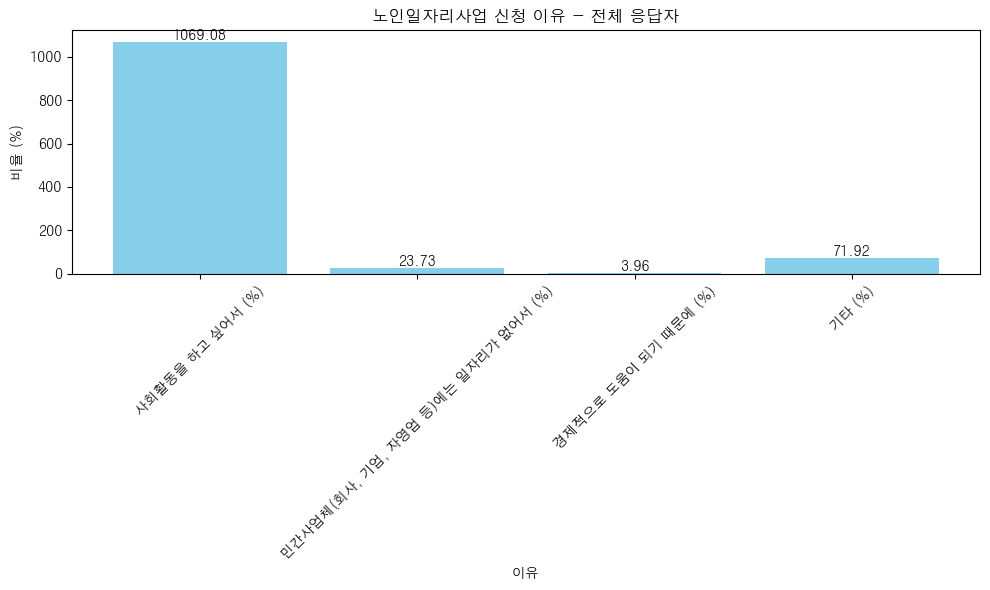

In [88]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(10, 6))
plt.bar(categories, overall_values, color='skyblue')

plt.title('노인일자리사업 신청 이유 - 전체 응답자')
plt.xlabel('이유')
plt.ylabel('비율 (%)')

for i in range(len(overall_values)):
    plt.text(i, overall_values[i], f'{overall_values[i]:.2f}', ha = 'center', va = 'bottom')

plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()